#Segunda Parte do Projeto:

###Importação das bibliotecas:

In [384]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

###Carregando conjunto de dados:

In [385]:
df = pd.read_csv("/content/drive/MyDrive/Datascience/datasets/df_final.csv")

In [386]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

###Informação estatística:

In [388]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.353000e+03,5353.000000,5353.000000,5.353000e+03,5351.000000,5353.000000,5353.000000
mean,2.776581e+07,111178.287129,36.062382,7.710544e+07,106.528873,6.136391,713.720531
std,4.116110e+07,186090.714529,260.475179,1.596430e+08,22.269636,1.198828,1268.053435
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,9488.000000,5.251143,0.000000e+00,93.000000,5.600000,57.000000
50%,1.200000e+07,19153.000000,14.086292,1.410928e+07,103.000000,6.300000,240.000000
75%,3.700000e+07,103370.000000,30.387754,8.414683e+07,117.000000,6.900000,766.000000
max,3.800000e+08,874562.000000,13195.451000,2.787965e+09,338.000000,10.000000,13752.000000


In [389]:
df.describe(include="O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5353,2102,5353,5353,5353,5350,5353,5353,5352,5353,5353,4380,5353,5353,5353
unique,1426,2071,4651,38,5329,5340,4216,537,3566,620,3,4347,5327,5301,5318
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Demonic,Jordan Turner is an experienced 911 operator b...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice is coming.,The Call,[],[]
freq,370,4,523,5049,2,2,359,2977,10,3171,5345,3,2,45,28


###Dicionário de Dados:

In [390]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

*   **budget**: Orçamento do Filmes em Dólares
*   **genres**: Lista de Dicionários com todos os gêneros associados ao filme
*   **homepage**: Site oficial do filme
*   **id**: Identificação (ID) do filme
*   **keywords**: Palavras chaves associadas ao filme
*   **original_language**: Idioma original do filme
*   **original_title**: Título original do filme
*   **overview**: Breve descrição do filme
*   **popularity**: Pontuação dada pelo TMDB
*   **production_companies**: Produtoras envolvidas na produção do filme
*   **release_data**: Data de Lançamento do Filme
*   **revenue**: Receita Total do filme em dólares
*   **runtime**: Tempo de execução do filme em minutos
*   **spoken_language**: Idiomas falados no filme
*   **status**: Status do filme (lançado, para ser lançado, anunciado, etc)
*   **tagline**: Tagline do filme
*   **title**: Título oficial do filme
*   **vote_average**: Avaliação média do filme
*   **vote_count**: Número de votos contabilizados pelo TMDB
*   **cast**: Elenco do filme
*   **crew**: Equipe Técnica



###Dados Faltantes:

In [391]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3251
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  973
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

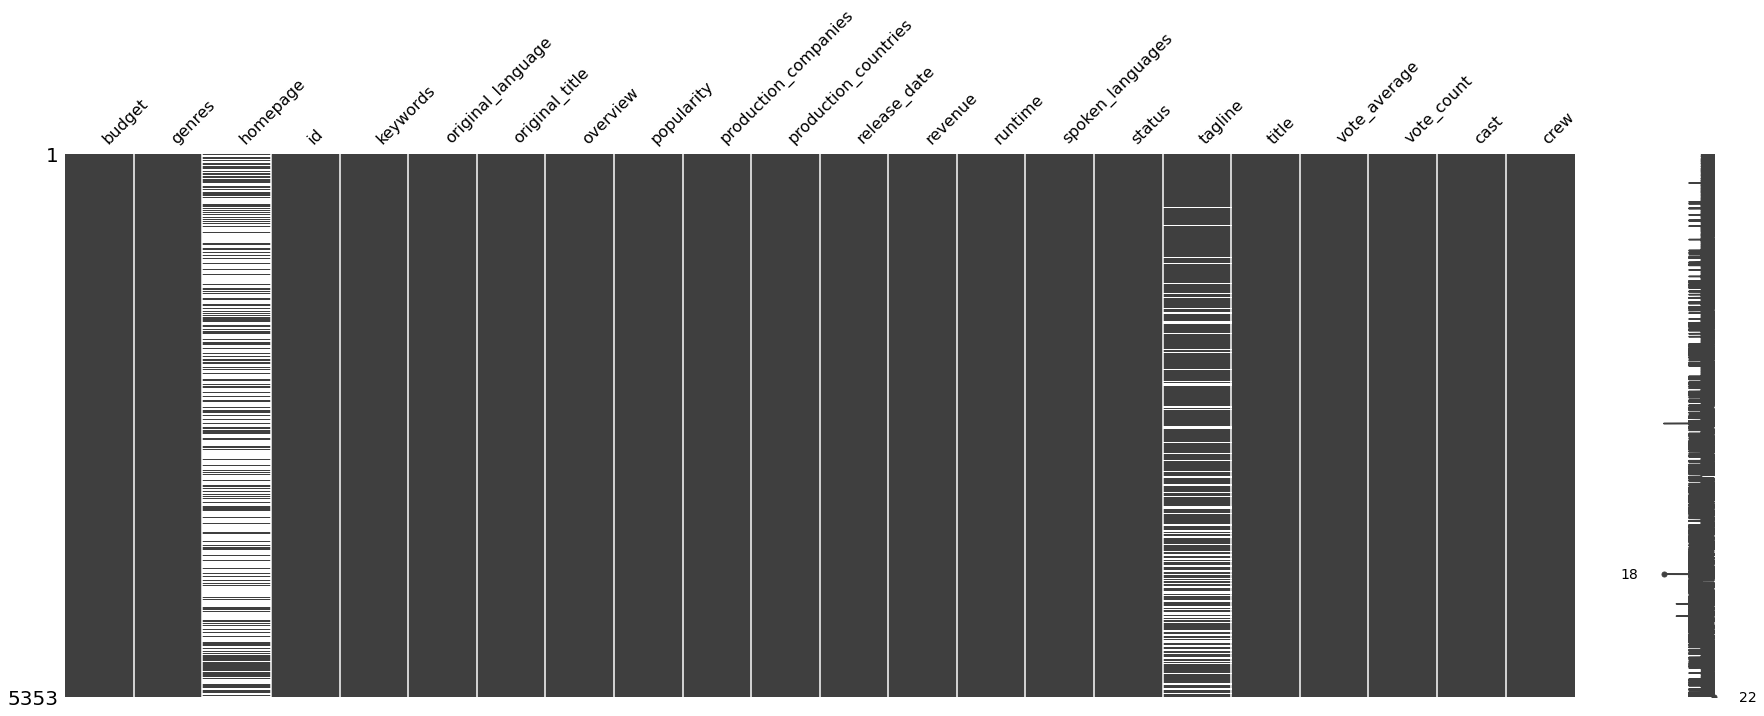

In [392]:
missingno.matrix(df, figsize=(30,10))

In [393]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [394]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452.0,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254.0,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833.0,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668.0,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [395]:
linhas, colunas = df.shape

In [396]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

##Dados Duplicados:

In [397]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5155,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.godzillavskong.net/,399566.0,"[{'id': 11100, 'name': 'giant monster'}, {'id'...",en,Godzilla vs. Kong,"In a time when monsters walk the Earth, humani...",544.312,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-03-24,467863133,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,7.8,7532,"[{'adult': False, 'gender': 2, 'id': 28846, 'k...","[{'adult': False, 'gender': 2, 'id': 1706, 'kn..."
5201,61000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.aquietplacemovie.com,520763.0,"[{'id': 2041, 'name': 'island'}, {'id': 4305, ...",en,A Quiet Place Part II,"Following the events at home, the Abbott famil...",316.703,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-21,297372261,97.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Silence is not enough.,A Quiet Place Part II,7.6,3804,"[{'adult': False, 'gender': 1, 'id': 5081, 'kn...","[{'adult': False, 'gender': 1, 'id': 555, 'kno..."
5232,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://www.thefastsaga.com,385128.0,"[{'id': 3428, 'name': 'speed'}, {'id': 9663, '...",en,F9,Dominic Toretto and his crew battle the most s...,663.530,"[{'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-05-19,721077945,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Justice is coming.,F9,7.4,4865,"[{'adult': False, 'gender': 2, 'id': 12835, 'k...","[{'adult': False, 'gender': 1, 'id': 2519, 'kn..."
5251,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/black-widow,497698.0,"[{'id': 470, 'name': 'spy'}, {'id': 782, 'name...",en,Black Widow,"Natasha Romanoff, also known as Black Widow, c...",581.175,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-07,378328978,134.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Her world. Her secrets. Her legacy.,Black Widow,7.5,6813,"[{'adult': False, 'gender': 1, 'id': 1245, 'kn...","[{'adult': False, 'gender': 1, 'id': 1245, 'kn..."
5272,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/jungle-cruise,451048.0,"[{'id': 10787, 'name': 'jungle'}, {'id': 15824...",en,Jungle Cruise,Dr. Lily Houghton enlists the aid of wisecrack...,576.480,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-28,217000000,127.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Jungle Cruise,7.6,3854,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 8221, 'kn..."
5289,110000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",https://www.20thcenturystudios.com/movies/free...,550988.0,"[{'id': 282, 'name': 'video game'}, {'id': 141...",en,Free Guy,A bank teller called Guy realizes he is a back...,818.018,"[{'id': 27711, 'logo_path': '/3e294jszfE6cE8TO...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-08-11,331096766,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Life's too short to be a background character.,Free Guy,7.7,4716,"[{'adult': False, 'gender': 2, 'id': 10859, 'k...","[{'adult': False, 'gender': 1, 'id': 1720, 'kn..."
5314,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/shang-chi-and-th...,566525.0,"[{'id': 779, 'name': 'martial arts'}, {'id': 9...",en,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,207

##Análise de cada feature:

###Budget - Orçamento (em $):

In [398]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [399]:
type(df["budget"])

pandas.core.series.Series

In [400]:
type(df)

pandas.core.frame.DataFrame

In [401]:
df["budget"].dtypes

dtype('int64')

In [402]:
df["budget"].describe().round(2)

count    5.353000e+03
mean     2.776581e+07
std      4.116110e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+07
75%      3.700000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [403]:
df['budget'].max()

380000000

In [404]:
df['budget'].std()

41161096.009895295

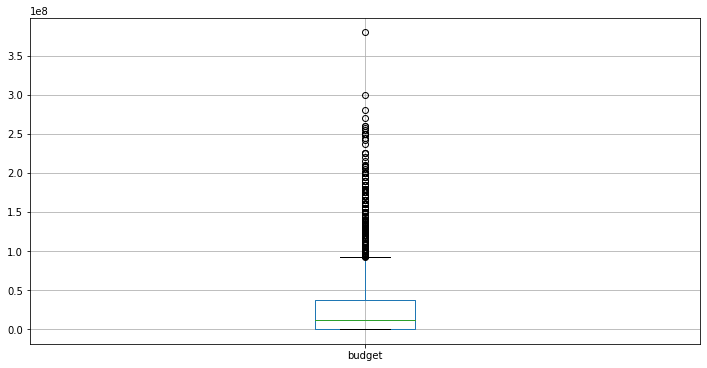

In [405]:
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

###Genres:

In [406]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [407]:
type(df["genres"])

pandas.core.series.Series

In [408]:
df["genres"].dtypes

dtype('O')

###Homepage:

In [409]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [410]:
df["homepage"].dtypes

dtype('O')

In [411]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

###Id - identificação dos filmes:

In [412]:
df["id"].head()

0     19995.0
1       285.0
2    206647.0
3     49026.0
4     49529.0
Name: id, dtype: float64

In [413]:
df["id"].dtypes

dtype('float64')

### keywords - Palavras chaves associadas ao filme:


In [414]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [415]:
df["keywords"].dtypes

dtype('O')

###original_language - a língua original do filme:

In [416]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [417]:
df["original_language"].nunique()

38

In [418]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'la'], dtype=object)

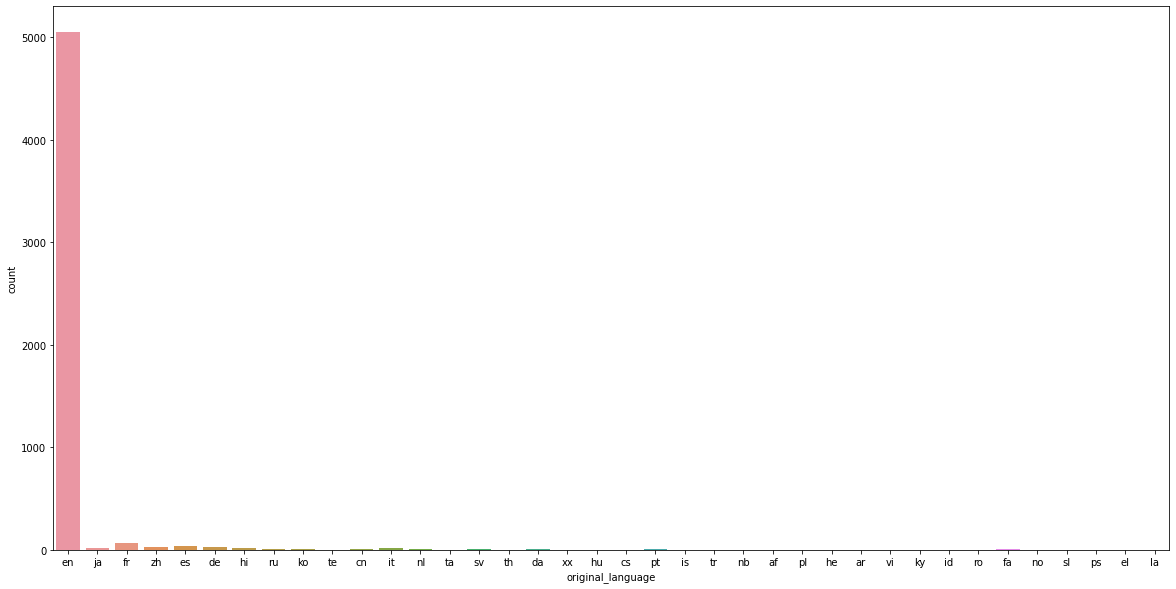

In [419]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

In [420]:
df["original_language"].value_counts()

en    5049
fr      72
es      34
de      27
zh      27
hi      19
ja      16
it      15
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ar       2
cs       2
ta       2
id       2
ro       2
pl       1
el       1
te       1
af       1
ky       1
vi       1
hu       1
ps       1
xx       1
sl       1
is       1
la       1
no       1
tr       1
nb       1
Name: original_language, dtype: int64

In [421]:
df["original_language"].describe()

count     5353
unique      38
top         en
freq      5049
Name: original_language, dtype: object

###original_title - Título original dos filmes:

In [422]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [423]:
df["original_title"].dtypes

dtype('O')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [425]:
df["original_title"].nunique()

5329

In [426]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

In [427]:
df["original_title"].count()

5353

In [428]:
df["original_title"].describe()

count        5353
unique       5329
top       Demonic
freq            2
Name: original_title, dtype: object

###Overview - Breve descrição dos filmes:

In [429]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [430]:
df["overview"].nunique()

5340

In [431]:
df["overview"].shape

(5353,)

In [432]:
df["overview"].describe()

count                                                  5350
unique                                                 5340
top       Jordan Turner is an experienced 911 operator b...
freq                                                      2
Name: overview, dtype: object

In [433]:
df["overview"].dtypes

dtype('O')

###Popularity - pontuação dada pelo TMDB:

In [434]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [435]:
df["popularity"].dtypes

dtype('float64')

In [436]:
df["popularity"].describe()

count     5353.000000
mean        36.062382
std        260.475179
min          0.000000
25%          5.251143
50%         14.086292
75%         30.387754
max      13195.451000
Name: popularity, dtype: float64

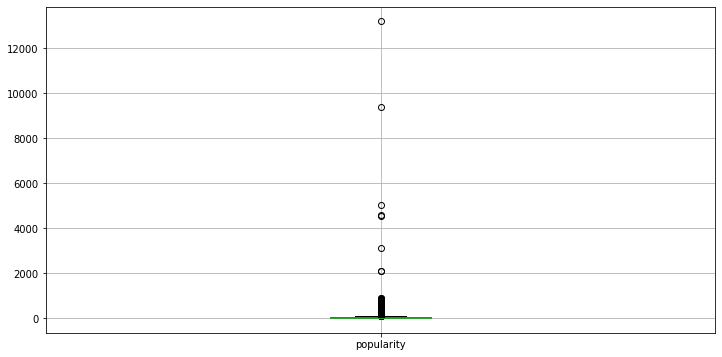

In [437]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

###Production Companies - Produtoras dos filmes listados:

In [438]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [439]:
df["production_companies"].dtypes

dtype('O')

In [440]:
df["production_companies"].describe()

count     5353
unique    4216
top         []
freq       359
Name: production_companies, dtype: object

###Release_date - Data de Lançamento do filme:

In [441]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [442]:
df["release_date"].dtypes

dtype('O')

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5353 non-null   int64  
 1   genres                5353 non-null   object 
 2   homepage              2102 non-null   object 
 3   id                    5353 non-null   float64
 4   keywords              5353 non-null   object 
 5   original_language     5353 non-null   object 
 6   original_title        5353 non-null   object 
 7   overview              5350 non-null   object 
 8   popularity            5353 non-null   float64
 9   production_companies  5353 non-null   object 
 10  production_countries  5353 non-null   object 
 11  release_date          5352 non-null   object 
 12  revenue               5353 non-null   int64  
 13  runtime               5351 non-null   float64
 14  spoken_languages      5353 non-null   object 
 15  status               

In [444]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5353 non-null   int64         
 1   genres                5353 non-null   object        
 2   homepage              2102 non-null   object        
 3   id                    5353 non-null   float64       
 4   keywords              5353 non-null   object        
 5   original_language     5353 non-null   object        
 6   original_title        5353 non-null   object        
 7   overview              5350 non-null   object        
 8   popularity            5353 non-null   float64       
 9   production_companies  5353 non-null   object        
 10  production_countries  5353 non-null   object        
 11  release_date          5352 non-null   datetime64[ns]
 12  revenue               5353 non-null   int64         
 13  runtime           

In [446]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [447]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5352
unique                   3566
top       2021-09-10 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2021-12-18 00:00:00
Name: release_date, dtype: object

In [448]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [449]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [450]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


###Revenue - Receita total do filme (em $):

In [451]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [452]:
df["revenue"].describe().round(2)

count    5.353000e+03
mean     7.710544e+07
std      1.596430e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.410928e+07
75%      8.414683e+07
max      2.787965e+09
Name: revenue, dtype: float64

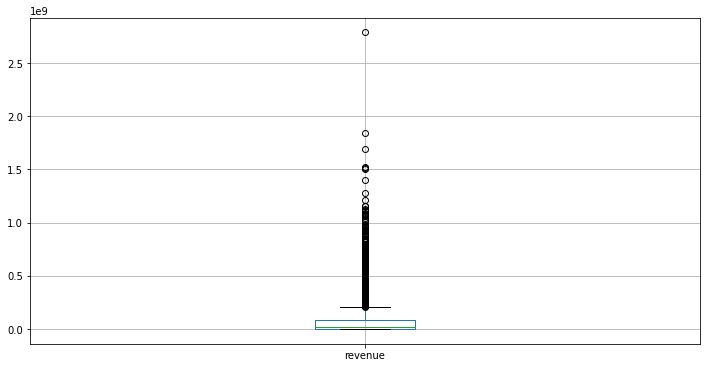

In [453]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

###Runtime - tempo de execução do filmes em horas e minutos:

In [454]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [455]:
df["runtime"].dtypes

dtype('float64')

In [456]:
df["runtime"].describe()

count    5351.000000
mean      106.528873
std        22.269636
min         0.000000
25%        93.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [457]:
df.isnull().sum().sort_values(ascending=False)

homepage                3251
tagline                  973
overview                   3
runtime                    2
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [458]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434.0,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


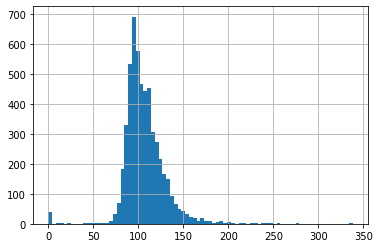

In [459]:
df["runtime"].hist(bins=80)

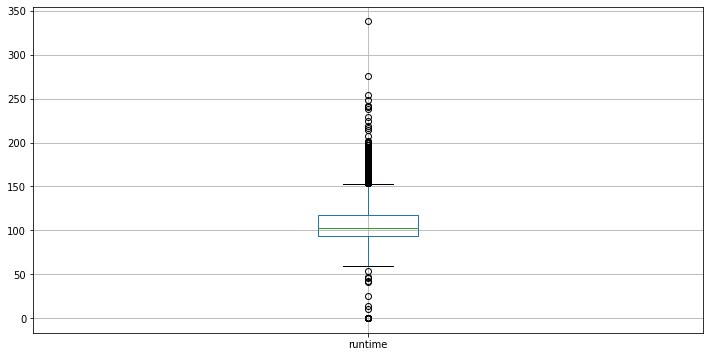

In [473]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

###Spoken_language - Línguas faladas no filme:

In [460]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [461]:
df["spoken_languages"].dtypes

dtype('O')

###Status - Status do filme (lançado, para ser lançado, anunciado, etc...)

In [462]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [463]:
df["status"].nunique()

3

In [464]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [465]:
df["status"].value_counts()

Released           5345
Rumored               5
Post Production       3
Name: status, dtype: int64

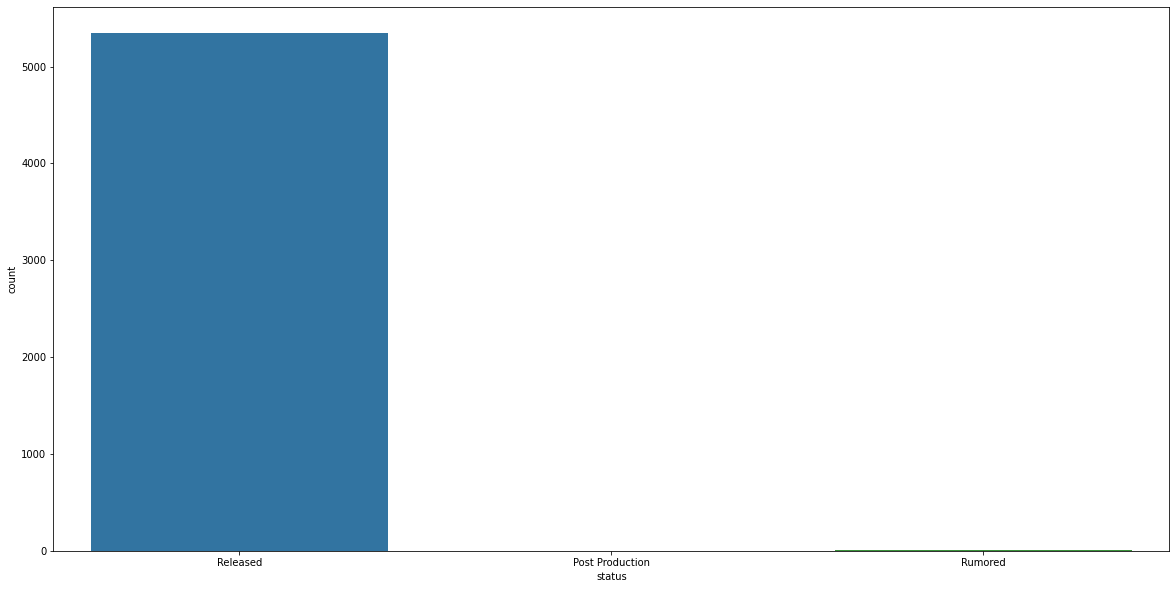

In [466]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

###Tagline - Tagline do filme:

In [467]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [468]:
df['tagline'].describe()

count                   4380
unique                  4347
top       Justice is coming.
freq                       3
Name: tagline, dtype: object

Title - Título oficial do Filme:

In [469]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [470]:
df["title"].dtypes

dtype('O')

In [471]:
df["title"].nunique()

5327

In [472]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'The Guilty', 'Birds of Paradise', 'After We Fell'],
      dtype=object)

###Vote_average - Avaliação média do filme

In [474]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [475]:
df['vote_average'].dtypes

dtype('float64')

In [476]:
df['vote_average'].describe()

count    5353.000000
mean        6.136391
std         1.198828
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

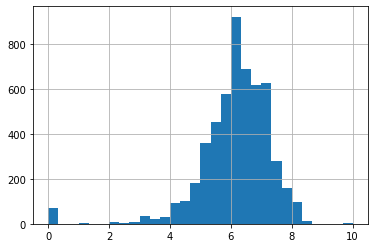

In [477]:
df['vote_average'].hist(bins=30)

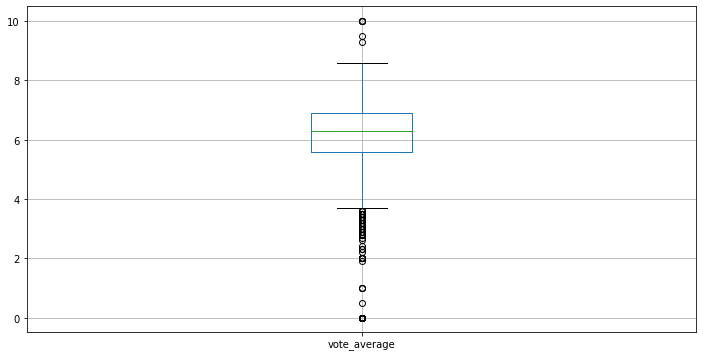

In [478]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [479]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861.0,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373.0,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505.0,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963.0,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [480]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706.0,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406.0,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027.0,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766.0,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662.0,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,839017.0,[],en,DOMINO: Battle of the Bones,"Hoping to reclaim his former glory, a fallen d...",1.537000,[],[],2021-06-11,0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Domino: Battle Of The Bones,0.0,0,"[{'adult': False, 'gender': 2, 'id': 15234, 'k...","[{'adult': False, 'gender': 2, 'id': 942302, '..."
5230,0,"[{'id': 99, 'name': 'Documentary'}]",http://acrimeonthebayou.com,763040.0,[],en,A Crime on the Bayou,A Crime on the Bayou is the story of Gary Dunc...,1.044000,"[{'id': 152942, 'logo_path': None, 'name': 'Au...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-06-18,0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,A Crime on the Bayou,0.0,0,[],"[{'adult': False, 'gender': 2, 'id': 18747, 'k..."
5288,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.hulu.com/movie/homeroom-3ba54579-2...,776523.0,"[{'id': 3687, 'name': 'graduation'}, {'id': 11...",en,Homeroom,Following the class of 2020 at Oakland High Sc...,3.149000,"[{'id': 125345, 'logo_path': None, 'name': 'Co...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-01-29,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This is not a test.,Homeroom,0.0,0,"[{'adult': False, 'gender': 0, 'id': 3169457, ...","[{'adult': False, 'gender': 2, 'id'

###Vote_coun - número de votos contabilizados pelo TMDB:

In [481]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [482]:
df['vote_count'].dtypes

dtype('int64')

In [483]:
df['vote_count'].describe()

count     5353.000000
mean       713.720531
std       1268.053435
min          0.000000
25%         57.000000
50%        240.000000
75%        766.000000
max      13752.000000
Name: vote_count, dtype: float64

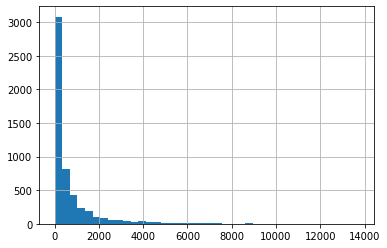

In [484]:
df['vote_count'].hist(bins=40)

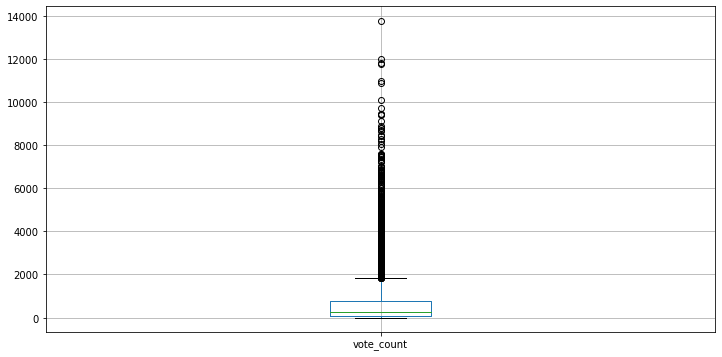

In [485]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [486]:
df[df["vote_count"] == 22907.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [487]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

709.0


###Cast - Elenco do filme:

In [488]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [489]:
df["cast"].dtypes

dtype('O')

###Crew - Equipe técnica do filme:

In [490]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [491]:
df["crew"].dtypes

dtype('O')

##Analisando e interpretando as features (colunas):